In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize

In [2]:
def Gauss(xm, mu, std):
    return 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (xm - mu)**2 / (2 * std**2))

def fake_threat_integrand(xm, mu, std, pc):
    return pc * Gauss(xm, mu, std)
                                                  
def fake_threat(x, mu, std, pc):
    return quad(fake_threat_integrand, -np.inf, x, args=(mu, std, pc))[0]

def miss_threat(x, mu, std, pc):
    return quad(fake_threat_integrand, x, np.inf, args=(mu, std, pc))[0]

vec_fake_threat = np.vectorize(fake_threat)
vec_miss_threat = np.vectorize(miss_threat)

Вероятность ложной тревоги: 0.0
Вероятность пропуска: 0.30854
Суммарная ошибка классификации: 0.30854 при х = 3
Минимально возможная ошибка классификации: 0.0 при х = 10.91764


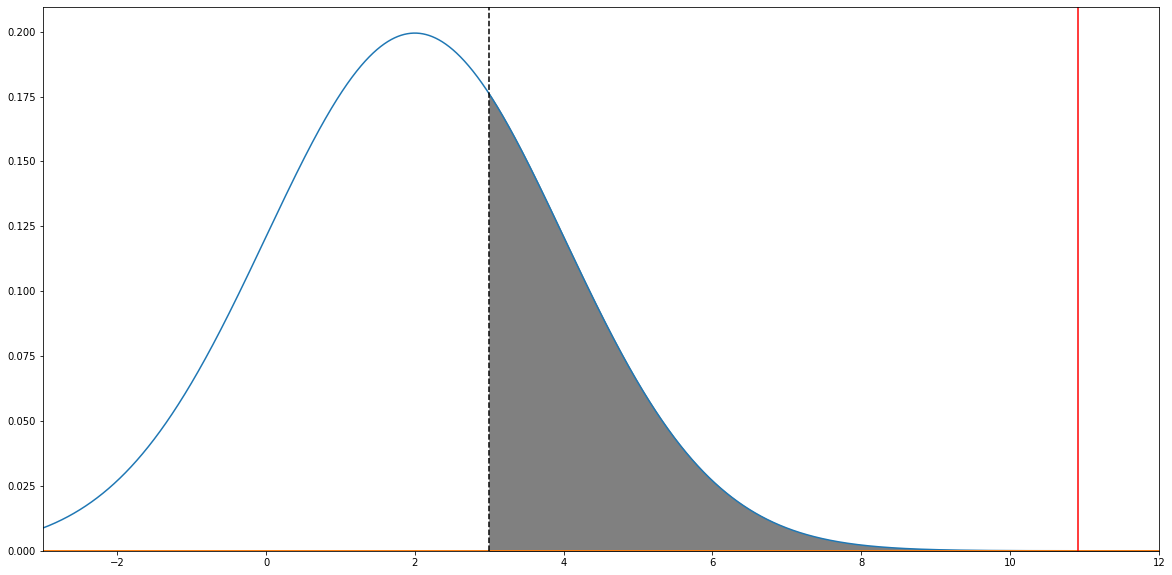

In [35]:
#input
pc_1 = 1
pc_2 = 1 - pc_1
x = 3

#preparations
mu_1, mu_2, std_1, std_2  = 2, 6, 2, 2
points_1, points_2 = np.linspace(mu_1 - 5*std_1, mu_1 + 5*std_1, 10000), np.linspace(mu_2 - 10*std_2, mu_2 + 10*std_2, 10000)
xmin, xmax = np.minimum(mu_1 - std_1 * 2.5, mu_2 - std_2 * 2.5), np.maximum(mu_1 + std_1 * 3, mu_2 + std_2 * 3)

#calculations
fake_threat = vec_fake_threat(x, mu_2, std_2, pc_2)
miss_threat = vec_miss_threat(x, mu_1, std_1, pc_1)
normal_1 = pc_1 * Gauss(points_1, mu_1, std_1)
normal_2 = pc_2 * Gauss(points_2, mu_2, std_2)
fake_threat_zone = pc_2 *Gauss(points_2[points_2 <= x], mu_2, std_2)
miss_threat_zone = pc_1 *Gauss(points_1[points_1 >= x], mu_1, std_1)
optimal_x = minimize(lambda x : vec_fake_threat(x, mu_2, std_2, pc_2) + vec_miss_threat(x, mu_1, std_1, pc_1), x).x[0]

#output
print('Вероятность ложной тревоги:', np.round(fake_threat, 5))
print('Вероятность пропуска:',np.round(miss_threat, 5))
print('Суммарная ошибка классификации:', np.round(fake_threat + miss_threat, 5), 'при х =', np.round(x, 5))
print('Минимально возможная ошибка классификации:', np.round((vec_fake_threat(optimal_x, mu_2, std_2, pc_2) + vec_miss_threat(optimal_x, mu_1, std_1, pc_1)), 5), 'при х =', np.round(optimal_x, 5))

plt.figure(figsize=(20, 10))
plt.plot(points_1, normal_1)
plt.plot(points_2, normal_2)
plt.ylim(ymin=0)
plt.xlim(xmin=xmin, xmax=xmax)
plt.axvline(x=x, color='black', linestyle='--')
plt.axvline(x=optimal_x, color='red')
plt.fill_between(points_2[points_2 <= x], fake_threat_zone, color='lightgrey')
plt.fill_between(points_1[points_1 >= x], miss_threat_zone, color='grey')
plt.show()